This notebook shows different user cases in our web application and their expected output.

In [1]:
import sys
sys.path.insert(0, "..")

# Data loader
This api is not user-interactive.

In [2]:
from covid_simulation.preprocessing.isciii import load_dataframe, preprocess_isciii

url = "https://covid19.isciii.es/resources/serie_historica_acumulados.csv"
data = load_dataframe(url)
data = preprocess_isciii(data, daily=False)

# Prediction model

In [4]:
import datetime as dt
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

from covid_simulation.prediction.prediction import predict_for_simulation
from covid_simulation.preprocessing.isciii import list_region
from covid_simulation.prediction.models import dic_models

def api_prediction_output(fecha_inicio, region, model, params, predicted_days):
    case = "ingreso"
    min_cases = 0
    y, m, d = fecha_inicio.split("-")
    fecha_inicio = dt.datetime(int(y), int(m), int(d))
    df = predict_for_simulation(data, region, min_cases, fecha_inicio, model, params, predicted_days)
    return df


def api_prediction_plot(df, predicted_days):
    x = df["dia"].values
    y = df["ingreso"].values

    # Prediction
    x_pred = x[-predicted_days:]
    y_pred = y[-predicted_days:]

    plt.figure(dpi=120)
    plt.plot(x, y)
    plt.plot(x_pred, y_pred)

    # Ticks
    labels = [""] * df.shape[0]
    labels[::4] = [item.strftime('%b %d') for item in df["dia"][::4]]
    plt.xticks(x, labels, rotation=45)

    plt.title("Hospitalizations per day")
    plt.ylabel("Hospitalizations")
    plt.legend(["Ground truth", "Prediction"])

    plt.show()

print("Aviable region:")
for region in list_region:
    print("  ", region)
print("Aviable models:")
for key, value in dic_models.items():
    print("  ", key, value)

Aviable region:
   andalucia
   aragon
   asturias
   baleares
   canarias
   cantabria
   castilla-lamancha
   castillayleon
   cataluña
   ceuta
   c.valenciana
   extremadura
   galicia
   madrid
   melilla
   murcia
   navarra
   paisvasco
   larioja
Aviable models:
   tanh_cdf ['a', 'b', 'c']
   tanh_KM_cdf ['a', 'b', 'c']
   gompertz_cdf_nonorm ['a', 'u', 'd', 'y0']
   exp_cdf_nonorm ['a', 'b', 'c']
   gompertz_simple ['a', 'u', 'd']


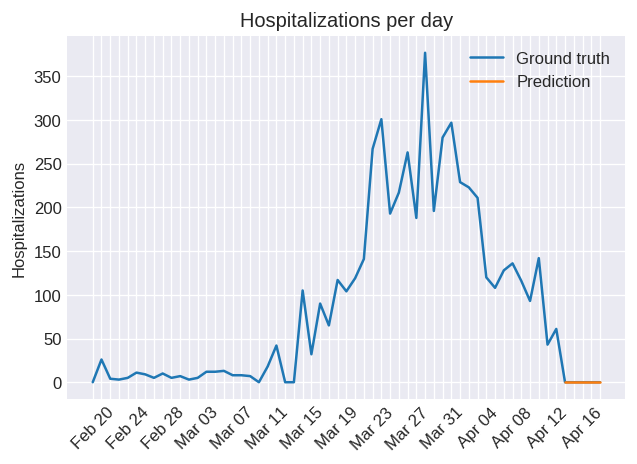

In [5]:
# User input
fecha_inicio = "2020-3-1"
region = "andalucia"
model = "tanh_cdf"
params = {'a': 50,
          'b': 0.13,
          'c': 3}
predicted_days = 5

# Output
df = api_prediction_output(fecha_inicio, region, model, params, predicted_days)
api_prediction_plot(df, predicted_days)

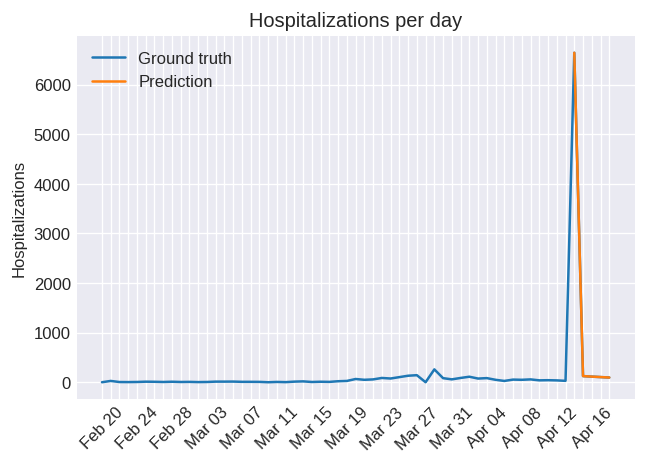

In [7]:
# User input
fecha_inicio = "2020-3-1"
region = "aragon"
model = "gompertz_simple"
params = {"a": 10000,
          "u": 1000,
          "d": 15}
predicted_days = 5

# Output
df = api_prediction_output(fecha_inicio, region, model, params, predicted_days)
api_prediction_plot(df, predicted_days)